In [218]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt 
import matplotlib 
import numpy as np 
import random
%matplotlib inline

In [219]:
# Valores de entradas exemplos, features ou atrubutos
d0 = 50
d1 = 200
d2 = 1500
d3 = 2500
d4 = 4000

d = [d0, d1, d2, d3, d4]
# Valores das potências
p0 = 0
p1 = -25
p2 = -50
p3 = -70
p4 = -90

p = [p0, p1, p2, p3, p4]
K = len(p)
y = np.zeros((K,1))

for i in range(0, K):
    y[i,0] = p[i]
    


x =  np.zeros((K,1))
for i in range(0, K):
    x[i,0] = 10*np.log10(d[i]/d0)



In [220]:
# Gerando valores para os parâmetros
N = 200 
a0 = np.linspace(-10.0, 14.0, N)
a1 = np.linspace(-20.0, 14.0, N)
A0, A1 = np.meshgrid(a0, a1) 

In [221]:
# Gerando os ponto para plotar a superfície de erro 
J = np.zeros((N,N))
for iter1 in range(0,N):
    for iter2 in range(0,N):
        yhat = A0[iter1][iter2] + A1[iter1][iter2]*x
        J[iter1][iter2] = (1/K)*np.sum(np.square(y-yhat))

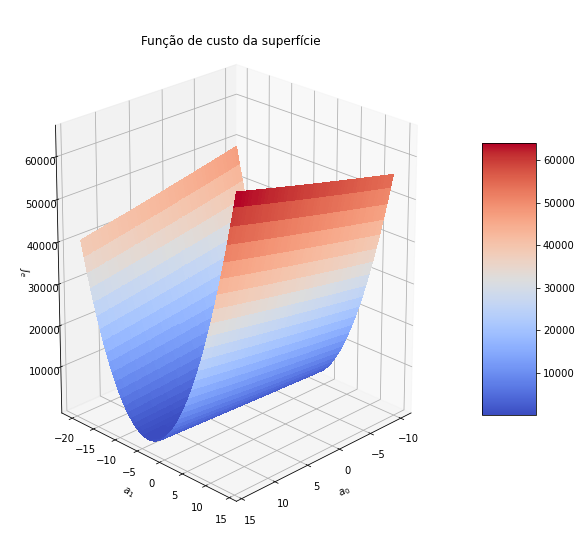

In [222]:
# Plotandoa a superfície de erro 
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased = False)

fig.colorbar(surf, shrink=0.5, aspect =5)

ax.set_xlabel('$a_0$')
ax.set_ylabel('$a_1$')
ax.set_zlabel('$J_e$')

plt.title('Função de custo da superfície')
ax.view_init(20,45)



In [223]:
X = np.c_[np.ones((K, 1)), x]
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0,0] + a_opt[1,0]*x
Joptimum = (1/K)*np.sum(np.power((y-yhat),2))
print(f'Os valores de a0 e a1 encrontrados pela equação normal são: {a_opt[0,0]}; {a_opt[1,0]}')

Os valores de a0 e a1 encrontrados pela equação normal são: 2.038360559134162; -4.315813966543262


In [224]:
# implementação odo gradiente descedente
maxNumIter = 100000

alpha = 0.001

a = np.zeros((2,maxNumIter))
Jgd = np.zeros(maxNumIter)

a[0,0] = a_opt[0,0]+0.5
a[1,0] = a_opt[1,0]+0.5

yhat = a[0,0] + a[1,0]*x

Jgd[0] =    (1/K)*np.sum(np.power((y-yhat),2))

error = 1
iter = 0

while(error>0.001 and iter<maxNumIter):
    yhat = a[0, iter] + a[1, iter]*x
    update = -(2/K)*np.transpose((y-yhat)).dot(X)
    a_aux = a[:,iter] - alpha*np.transpose(update)
    a[0,iter+1] = a_aux[0,0]
    a[1,iter+1] = a_aux[1,0]
    yhat = a[0,iter+1] + a[1,iter+1]*x
    Jgd[iter+1] = (1/K)*sum(np.power(y-yhat,2))
    error = np.abs(Jgd[iter]-Jgd[iter+1])
    iter =iter+1

print(f'Os valores de a0 e a1 encrontrados pela equação normal são: { a_aux[0,0]}; { a_aux [1,0]}')


Os valores de a0 e a1 encrontrados pela equação normal são: -3.7517970529946316; -3.8051216483599846


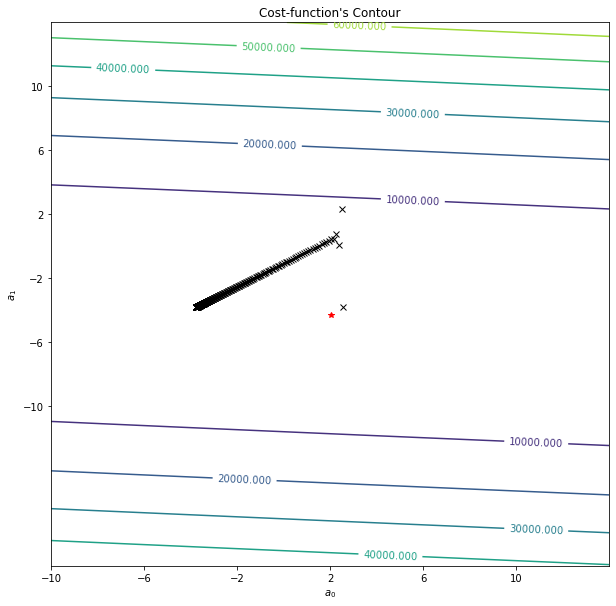

In [225]:
fig = plt.figure(figsize=(10,10))

cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$')
plt.ylabel('$a_1$')
plt.title('Cost-function\'s Contour')

plt.plot(a_opt[0,0], a_opt[1,0], c='r', marker='*')
plt.plot(a[0, 0:iter], a[1, 0:iter], 'kx')

plt.xticks(np.arange(-10, 14, step=4.0))
plt.yticks(np.arange(-10, 14, step=4.0))
plt.show()